# Exercise 9: Integration Schemes

## 9.1 Exercise: Harmonic Oscillators
Euler integrator:
$$
p(t + \Delta t) = p(t) - x(t) \Delta t \\
x(t +\Delta t) = x(t) + p(t) \Delta t
$$

second integrator:

$$
p(t + \Delta t) = p(t) - x(t) \Delta t \\
x(t +\Delta t) = x(t) + p(t + \Delta t) \Delta t
$$

#### a) Expressing the integrators in Matrix form:

$$
\begin{pmatrix}
x \\ p
\end{pmatrix}_{t+\Delta t} 
= M \times \begin{pmatrix}
x \\ p
\end{pmatrix}_{t} \tag{1}
$$

For the Euler integrator:
$$ M_{1} = \begin{bmatrix}
1 & \Delta t \\
-\Delta t & 1 \\
\end{bmatrix}
$$
and for the determinant of $M_1$:
$$ det[M_1] =
\begin{vmatrix}
1 & \Delta t \\
-\Delta t & 1 \\
\end{vmatrix} = 1 + (\Delta t)² \geqq 1
$$

This is a clear sign it is not a symplectic Matrix, and thus not a symplectic integration method.

For the symplectic Euler integrator:
$$ M_{2} = \begin{bmatrix}
1- (\Delta t)² & \Delta t \\
-\Delta t & 1 \\
\end{bmatrix}
$$
and for the determinant of $M_1$:
$$ det[M_2] =
\begin{vmatrix}
1 - (\Delta t)² & \Delta t \\
-\Delta t & 1 \\
\end{vmatrix} = 1 - (\Delta t)² + (\Delta t)² = 1
$$
#### b) show that the Shadow Hamiltonian is conserved

the shadow Hamiltonian at a time $t$ is defined by 
$$
H'_t = H_t - \frac{p \ x  \ \Delta t}{2} = \frac{p²}{2} + \frac{x²}{2} - \frac{p \ x  \ \Delta t}{2}
$$

after a time step $\Delta t$ :
$$
2 \ H'_{t+ \Delta t}  = p²(t+\Delta t) + x²(t+\Delta t) + x(t+\Delta t) \ p(t+\Delta t) \Delta t \\

= \underline{p² }-2px\Delta t +x²\Delta t² + \underline{x²}-2x²\Delta t² +\Delta t⁴x² + 2x p \Delta t - 2\Delta t³ x p +p² \Delta t² \ \underline{-px\Delta t }+ x²\Delta t² +px\Delta t³ -x² \Delta t4 -p²\Delta t² +xp\Delta t³ \\
= 2 H'_t

$$
where in the second line, all terms that are not underlined cancel each other out exactly, they appear twice with opposite signs.
This means that any integration step leaves the shadow hamiltonian unchanged.






In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import csv
data = []
with open('Intgeration_Data.csv') as csvfile:
    contents= csv.reader(csvfile, delimiter=";")
    #next(contents)#skip header line
    for row in contents:
        data.append(np.asarray(row).astype('double'))
t_small=data[0]
euler_small=data[1:5]

symplectic_small=data[5:10]
t_big= data[10]

euler_big= data[11:15]
symplectic_big=data[15:20]
velocity_verlet=data[20:24]
verlet=data[24:30]
test_vel_verlet=data[30:36]
test_vel_verlet2=data[36:]
print(len(data))


48


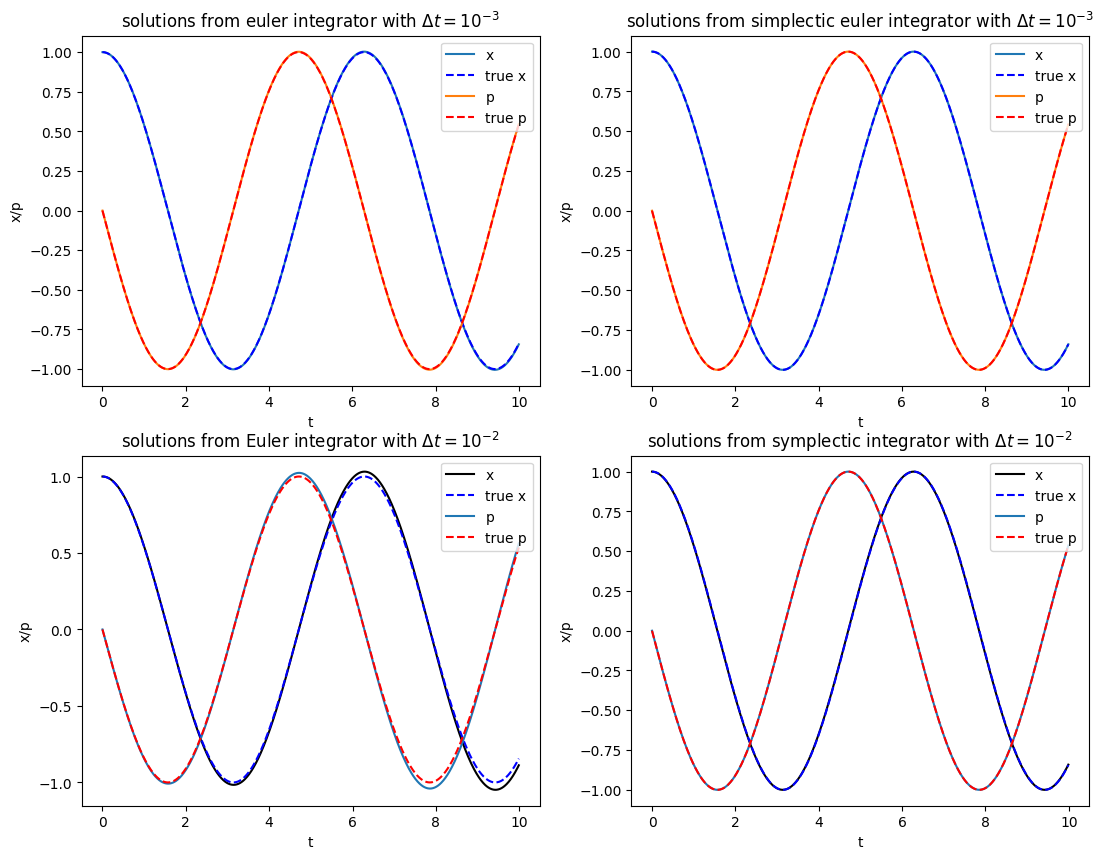

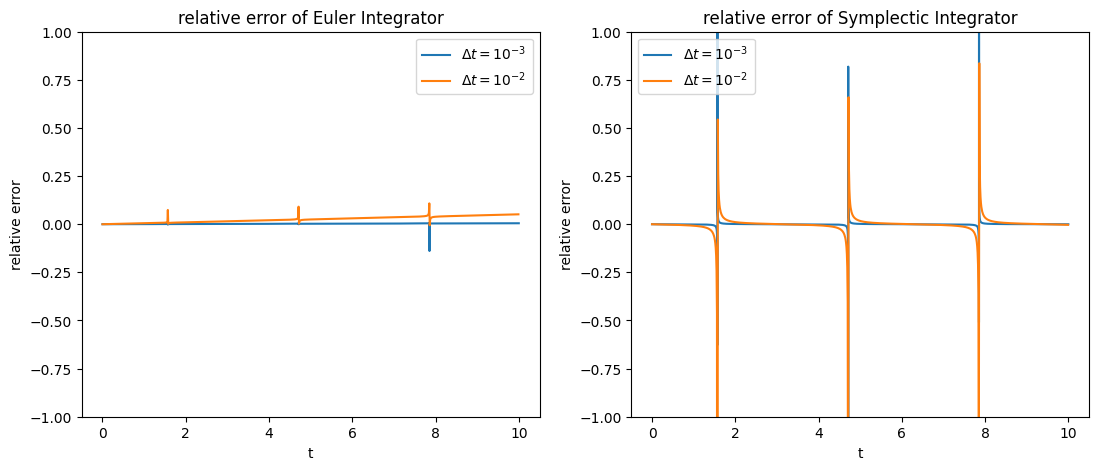

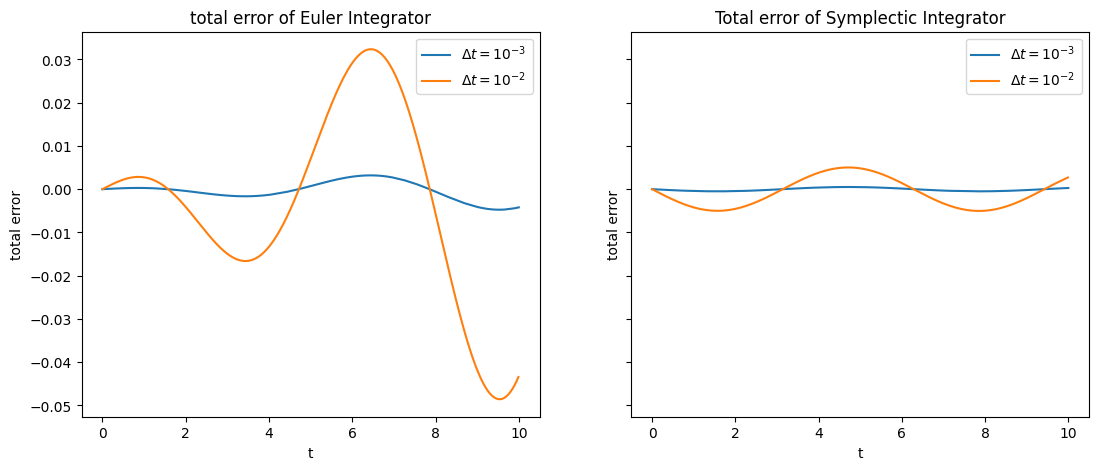

In [7]:
fig, axs = plt.subplots(2,2,figsize=(13,10))

axs[0][0].set_title("solutions from euler integrator with $\Delta t = 10^{-3}$")
axs[0][0].plot(t_small,euler_small[0], label="x")
axs[0][0].plot(t_small,np.cos(t_small), color="blue", linestyle= "--",label="true x")
axs[0][0].plot(t_small, euler_small[1],label= "p")
axs[0][0].plot(t_small, -np.sin(t_small), color="red", linestyle="--",label = "true p")
axs[0][0].set_ylabel("x/p")
axs[0][0].set_xlabel("t")
axs[0][0].legend()

axs[0][1].set_title("solutions from simplectic euler integrator with $\Delta t = 10^{-3}$")
axs[0][1].plot(t_small,symplectic_small[0], label="x")
axs[0][1].plot(t_small,np.cos(t_small), color="blue", linestyle= "--",label="true x")
axs[0][1].plot(t_small, symplectic_small[1],label= "p")
axs[0][1].plot(t_small, -np.sin(t_small), color="red", linestyle="--",label = "true p")
axs[0][1].set_ylabel("x/p")
axs[0][1].set_xlabel("t")
axs[0][1].legend()

axs[1][0].set_title("solutions from Euler integrator with $\Delta t = 10^{-2}$")
axs[1][0].plot(t_big,euler_big[0], color="black",label="x")
axs[1][0].plot(t_big,np.cos(t_big), color="blue", linestyle= "--",label="true x")
axs[1][0].plot(t_big, euler_big[1],label= "p")
axs[1][0].plot(t_big, -np.sin(t_big), color="red", linestyle="--",label = "true p")
axs[1][0].set_ylabel("x/p")
axs[1][0].set_xlabel("t")
axs[1][0].legend()


axs[1][1].set_title("solutions from symplectic integrator with $\Delta t = 10^{-2}$")
axs[1][1].plot(t_big,symplectic_big[0],color="black", label="x")
axs[1][1].plot(t_big,np.cos(t_big), color="blue", linestyle= "--",label="true x")
axs[1][1].plot(t_big, symplectic_big[1],label= "p")
axs[1][1].plot(t_big, -np.sin(t_big), color="red", linestyle="--",label = "true p")
axs[1][1].set_ylabel("x/p")
axs[1][1].set_xlabel("t")
axs[1][1].legend()

fig,axs = plt.subplots(1,2,figsize=(13,5))
axs[0].set_title("relative error of Euler Integrator")
axs[0].plot(t_small,euler_small[2], label="$\Delta t = 10^{-3}$ ")
axs[0].plot(t_big,euler_big[2], label="$\Delta t = 10^{-2}$ ")
axs[0].set_ylabel("relative error")
axs[0].set_xlabel("t")
axs[0].set_ylim(-1,1)
axs[0].legend()

axs[1].set_title("relative error of Symplectic Integrator")
axs[1].plot(t_small,symplectic_small[2], label="$\Delta t = 10^{-3}$ ")
axs[1].plot(t_big,symplectic_big[2], label="$\Delta t = 10^{-2}$ ")
axs[1].set_ylabel("relative error")
axs[1].set_xlabel("t")
axs[1].set_ylim(-1,1)
axs[1].legend()

fig,axs = plt.subplots(1,2,figsize=(13,5),sharey=True)
axs[0].set_title("total error of Euler Integrator")
axs[0].plot(t_small,euler_small[2]*np.cos(t_small), label="$\Delta t = 10^{-3}$ ")
axs[0].plot(t_big,euler_big[2]*np.cos(t_big), label="$\Delta t = 10^{-2}$ ")
axs[0].set_ylabel("total error")
axs[0].set_xlabel("t")

axs[0].legend()

axs[1].set_title("Total error of Symplectic Integrator")
axs[1].plot(t_small,symplectic_small[2]*np.cos(t_small), label="$\Delta t = 10^{-3}$ ")
axs[1].plot(t_big,symplectic_big[2]*np.cos(t_big), label="$\Delta t = 10^{-2}$ ")
axs[1].set_ylabel("total error")
axs[1].set_xlabel("t")

axs[1].legend()

plt.show()

In the upper row, I plotted the trajectories and velocities of the harmonic oscillators on the left with the regular euler Integrator, on the right with the symplectic, and with a step size of $\Delta t =0.001$ For the small step size both look okay, but for the bigger step size  of $\Delta t = 0.1$ the regular Euler shows already clear visible deviations from the theoretical trajectory.

this is even more clearly visible in the second figure where the relative error is plotted for different timesteps. The big vertical dashes appear whenever small values occur. FOr the regular Euler, the relative error grows linearly over the course of the simulation, with very narrow spikes around small values. A bigger stepsize leads to a steeper linear growth and also bigger spikes.

For the symplectic Integrator at first glance it looks much worse,because the  spikes are much larger, but it shows periodic behaviour without  a strong linear growth underneath, increasing the stepsize simply means broadening the spike in relative error around small values. If one let the simulation run longer, the linear error increase of the regular euler would be much larger,and affect all values, not just small values.

The advantages of the symplectic Integrator become even more obvious when looking at the tota error
FOr the Euler  there is a generally bigger total error, which escalates over time.A 10 fold decrease in step size seems to lead to 10 fold increase of the error
FOr the symplectic Integrator the total error fluctuates slighlty around 0, but the amplitude seems to be remaining roughly constant on this time scale

In summation, for most applications symplectic euler is much nicer than the regular, as it seems much more stable over time, and has a lower total error.
When the simulation time is short,timesteps are very small, and a high degree of accuracy for small values is required, the regular euler might be a better choice as the relative error is less problematic close to zero.



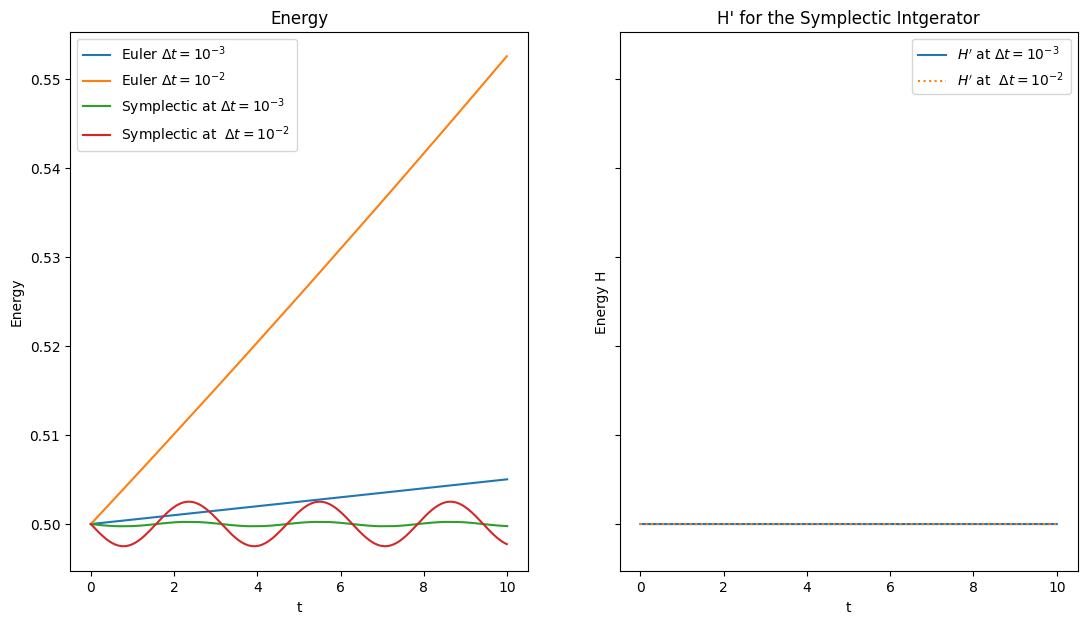

In [95]:

fig,axs = plt.subplots(1,  2,figsize=(13,7),sharey=True)
axs[0].set_title("Energy")
axs[0].plot(t_small,euler_small[3], label="Euler $ \Delta t = 10^{-3}$ ")
axs[0].plot(t_big,euler_big[3], label="Euler $\Delta t = 10^{-2}$ ")
axs[0].set_ylabel("Energy")
axs[0].set_xlabel("t")

axs[0].plot(t_small,symplectic_small[3], label="Symplectic at $ \Delta t = 10^{-3}$ ")
axs[0].plot(t_big,symplectic_big[3], label="Symplectic at  $\Delta t = 10^{-2}$ ")
axs[1].plot(t_small,symplectic_small[4],label="$H'$ at $ \Delta t = 10^{-3}$ ")
axs[1].plot(t_big,symplectic_big[4],linestyle = ":", label="$H'$ at  $\Delta t = 10^{-2}$ ")
axs[1].set_ylabel("Energy H")
axs[1].legend()
axs[1].set_title("H' for the Symplectic Intgerator")
axs[1].set_xlabel("t")


axs[0].legend()
plt.show()


For the regular Euler Intgerator one can see a strong energy drift, that grows in magnitude together with the increase of the integration timestep. The Energy of the symplectic integration fluctuates periodicly around the true value of $ H = 0.5$ with a constant seeming amplitude. This is much nicer behaviour when one wants to integrate trajectories accurately over time.
In the plot on the left, one can see clearly that allthough there are periodic fluctuations in the Hamiltonian, the Shadow Hamiltonian is perfectly conserved during the simulation with the symplectic algorithm, even for a larger timestep.

### Exercise 9.2 Velocity Verlet and regular Verlet

Both Algorithms were implemented to integrate the trajectory of a point particle in a harmonic oscillator in 1 Dimension.
As an Indicator of things going to plan, I plotted the Phase space trajectory from both. One can clearly see the typical Circleof a harmonic oscillator with these parameters. The trajectories overlap completely and the trajectory does not "break out" of the harmonic oscillator

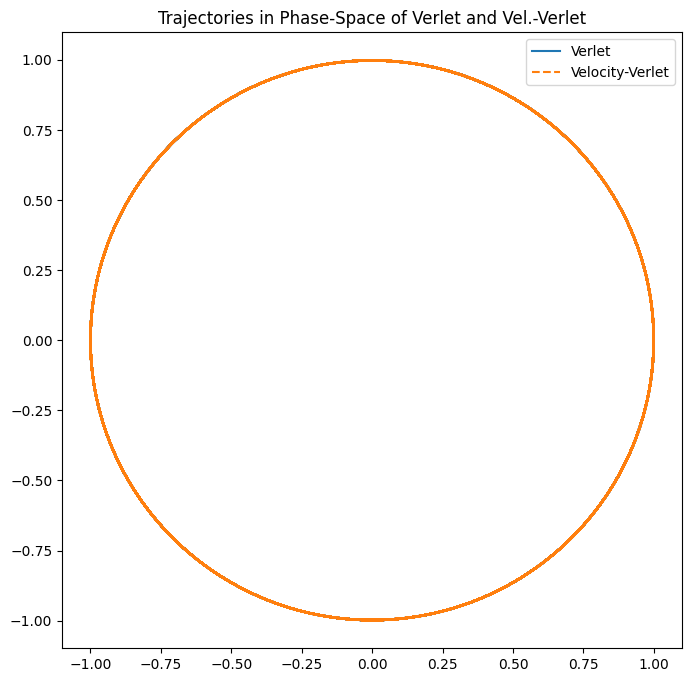

In [14]:


fig,axs= plt.subplots(1,1,figsize=(8,8))

#plt.scatter(t_big,(velocity_verlet[3]-velocity_verlet[3][0])/velocity_verlet[3][0], marker=".")
plt.plot(verlet[0],verlet[1],label = "Verlet")
plt.plot(velocity_verlet[0],velocity_verlet[1], label= "Velocity-Verlet", linestyle="--")
plt.title("Trajectories in Phase-Space of Verlet and Vel.-Verlet")
plt.legend()
plt.show()

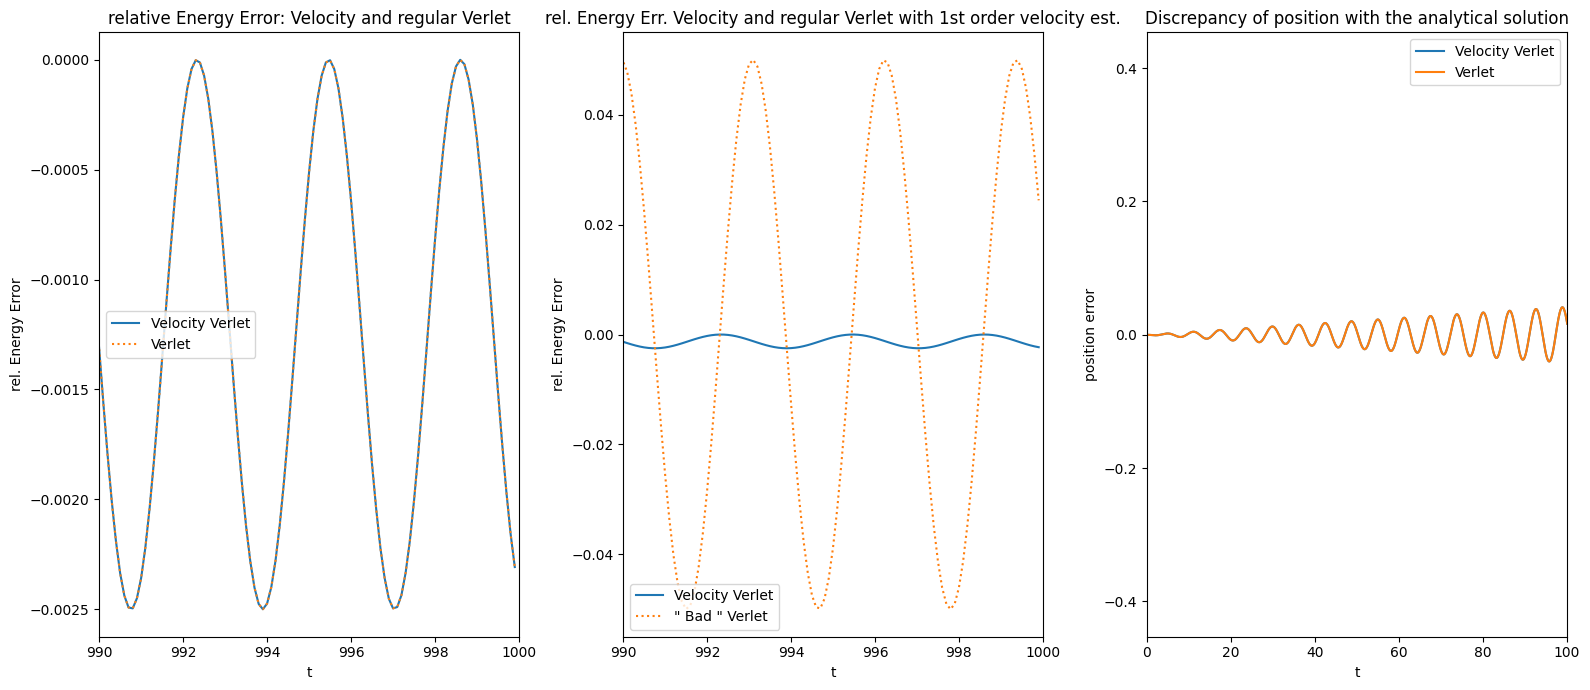

In [22]:
N_big=10000
t_big=np.arange(0,N_big*0.1, 0.1)


E_err_vel_verlet= (velocity_verlet[3]-0.5)/velocity_verlet[3][0]


E_err_verlet= (verlet[4]-verlet[4][0])/verlet[4][0]
E_err_verlet_bad= (verlet[5]-verlet[5][0])/verlet[5][0]
fig,axs = plt.subplots(1,  3,figsize=(16,7),tight_layout="True")
axs[0].set_title("relative Energy Error: Velocity and regular Verlet")
axs[0].plot(t_big,E_err_vel_verlet,label="Velocity Verlet")

axs[0].plot(t_big,E_err_verlet,label="Verlet", linestyle=":")

axs[0].set_ylabel("rel. Energy Error")
axs[0].set_xlabel("t")
axs[0].set_xlim(990,1000)
axs[0].legend()

axs[1].set_title("rel. Energy Err. Velocity and regular Verlet with 1st order velocity est.")
#axs[0].plot(t_big[9500:],E_err_verlet[9500:],linestyle="-" ,label="Verlet")
#axs[0].plot(t_big[9500:],E_err_vel_verlet[9500:],linestyle=":" ,label="Verlet")
axs[1].plot(t_big,E_err_vel_verlet,label="Velocity Verlet")
axs[1].plot(t_big,E_err_verlet_bad,label="\" Bad \" Verlet", linestyle=":")
axs[1].set_ylabel("rel. Energy Error")
axs[1].set_xlabel("t")
axs[1].set_xlim(990,1000)
axs[1].legend()

axs[2].plot(t_big,velocity_verlet[2],label="Velocity Verlet")
axs[2].plot(t_big,verlet[3],label="Verlet")
axs[2].set_xlim(0,100)
axs[2].set_ylabel("position error")
axs[2].legend()
axs[2].set_title("Discrepancy of position with the analytical solution")
axs[2].set_xlabel("t")

plt.show()


In the First Figure, the Total Energy is plotted over time. One can see that the energy is on average conserved, allthough the mean of the relative error is NOT zero. In this first plot, I estimated the velocity from the positions in the Verlet algorithm with 
$$ v(t-\Delta t) = \frac{ x(t)-x(t-2\Delta t)}{2 \Delta t}$$
As one can see in the plot, in this case the accuracy of the two algorithms and in fact the algorithms themselves are completely equivalent.
I also estimated the velocity from using information of just one timestep,
$$ v(t-\Delta t) = \frac{ x(t)-x(t-\Delta t)}{\Delta t}$$
 This is a worse approach as can see by the much bigger error for this approach in the middle plot.
 In any of these 3 cases the position itself is integrated with the same accuracy, which can be seen in the third plot, which makes sense seeing as they are mathematically equivalent.

 Lastly I checked the fact that the Velocity Verlet follows the analytical solution for $ \omega \Delta t < N$ ,here $\omega = 1$.
 I plotted the discrepancy between the analytical solution with the numerical solution for different timesteps on a log scale for easier comprehension. One can see that for $\Delta t <2$, the error is bounded. the overall amplitude of the error is bigger for biger timesteps, but the amplitude stays constant over time . For $\Delta t >2$, the error is many rders of magnitude bigger and the the Verlet integrator moves further and further away from the true trajectory over time


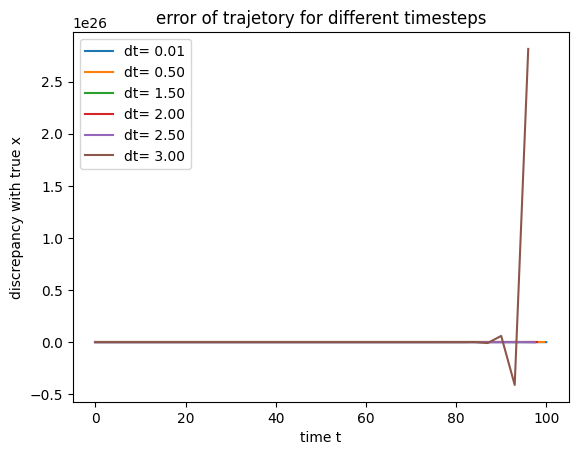

In [27]:
dt_test=np.array([0.01,0.5,1.5,2,2.5,3])
plt.yscale("log")
plt.title("error of trajetory for different timesteps")
for i, dt in enumerate( dt_test):
    times=np.arange(0,100,dt)
    length= int(100/dt)
    
    plt.plot(times[0:length],test_vel_verlet[i][0:length],label="dt= %.2f"%(dt))
plt.xlabel("time t")
#plt.ylim(-10,10)
plt.legend()
plt.ylabel("discrepancy with true x")
plt.show()

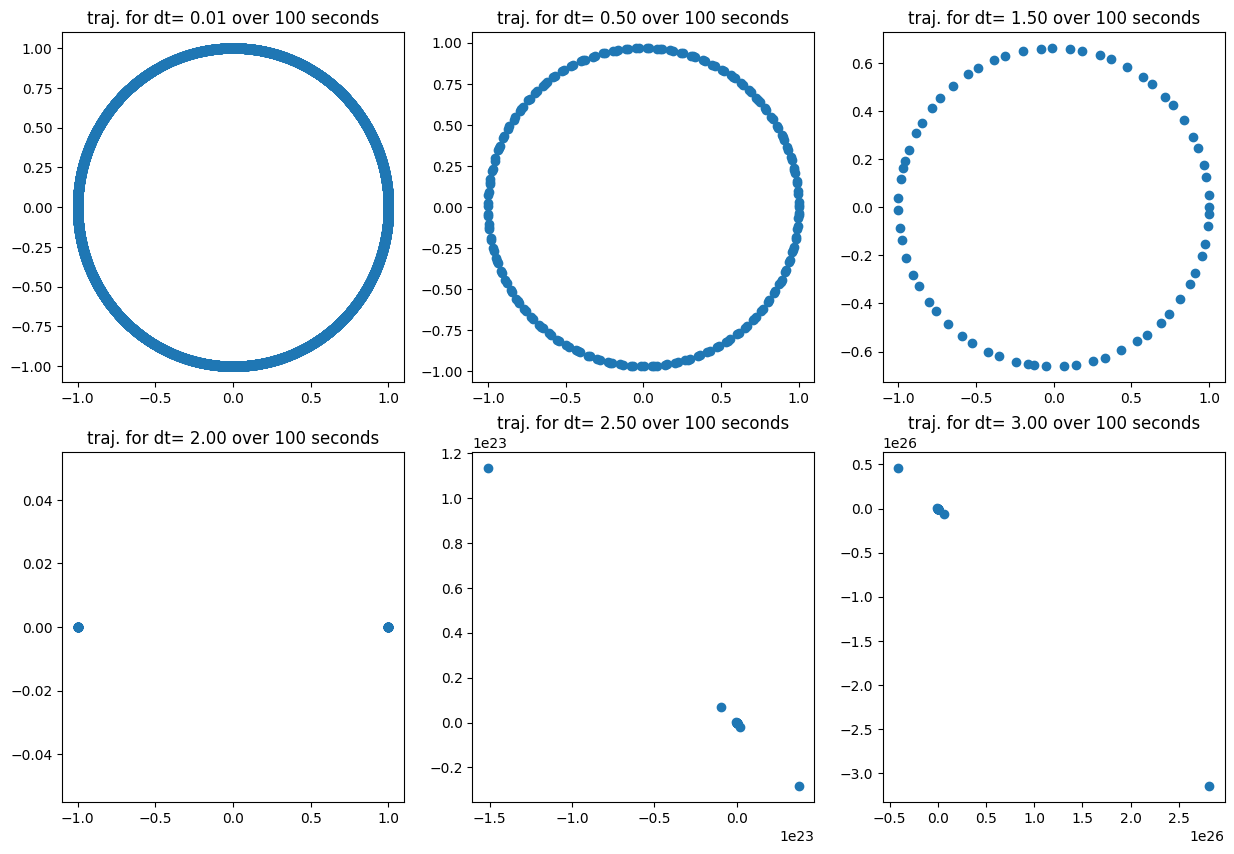

In [99]:
fig, axs= plt.subplots(2,3,figsize= (15,10))
for i,ax in enumerate(axs.flatten()):
    length= int(100/dt_test[i])
    ax.set_title("traj. for dt= %.2f over 100 seconds"%(dt_test[i]))
    ax.scatter(test_vel_verlet2[2*i][0:length],test_vel_verlet2[2*i+1][0:length])
